# HHL 

Try to implement HHL.

## imports

In [161]:
import numpy as np
import scipy as sp

# Import Qiskit
from qiskit import QuantumCircuit, transpile,  QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

from qiskit.circuit.library.phase_estimation import PhaseEstimation
from qiskit.circuit.library.arithmetic.exact_reciprocal import ExactReciprocal

## Prepare Vector and Matrix

In [162]:
nb = 1
nl = 8 # eigenvalue evaluation qubits
nf = 1 # if state preparation is probabilistic the number of qubit flags should increase
# na = 0 # ancillia count

A = np.array([[1,1],[1,-1]]) / np.sqrt(2)
b = np.array([1, 1]) / np.sqrt(2)

## Prepare Circuit

In [163]:
# Create a new circuit with two qubits
rb = QuantumRegister(nb)
rl = QuantumRegister(nl)
rf = QuantumRegister(nf)
crf = ClassicalRegister(nf)
crb = ClassicalRegister(nb)
# ra = QuantumRegister(na)

qc = QuantumCircuit(rb,rl,rf,crf,crb)

## State Preparation

In [164]:
qcb = QuantumCircuit(rb)
qcb.prepare_state(b / np.linalg.norm(b))

qc.append(qcb, rb[:])

qc.draw()

┌──────────────┐
  q581: ┤ circuit-9532 ├
        └──────────────┘
q582_0: ────────────────
                        
q582_1: ────────────────
                        
q582_2: ────────────────
                        
q582_3: ────────────────
                        
q582_4: ────────────────
                        
q582_5: ────────────────
                        
q582_6: ────────────────
                        
q582_7: ────────────────
                        
  q583: ────────────────
                        
 c16: 1/════════════════
                        
 c17: 1/════════════════

# QPE

In [165]:
qcA = QuantumCircuit(rb)
qcA.append(Operator(A).to_instruction(),[0])

qcpe = PhaseEstimation(nl,qcA)

qc.append(qcpe, rl[:] + rb[:])
qc.draw()


┌──────────────┐┌──────┐
  q581: ┤ circuit-9532 ├┤8     ├
        └──────────────┘│      │
q582_0: ────────────────┤0     ├
                        │      │
q582_1: ────────────────┤1     ├
                        │      │
q582_2: ────────────────┤2     ├
                        │      │
q582_3: ────────────────┤3 QPE ├
                        │      │
q582_4: ────────────────┤4     ├
                        │      │
q582_5: ────────────────┤5     ├
                        │      │
q582_6: ────────────────┤6     ├
                        │      │
q582_7: ────────────────┤7     ├
                        └──────┘
  q583: ────────────────────────
                                
 c16: 1/════════════════════════
                                
 c17: 1/════════════════════════

## Controled Rotation

In [166]:
c = 0.5
qccr = ExactReciprocal(nl,c)

qc.append(qccr.to_instruction(),  rl[::-1] + [rf[0]])
qc.draw()

┌──────────────┐┌──────┐        
  q581: ┤ circuit-9532 ├┤8     ├────────
        └──────────────┘│      │┌──────┐
q582_0: ────────────────┤0     ├┤7     ├
                        │      ││      │
q582_1: ────────────────┤1     ├┤6     ├
                        │      ││      │
q582_2: ────────────────┤2     ├┤5     ├
                        │      ││      │
q582_3: ────────────────┤3 QPE ├┤4     ├
                        │      ││      │
q582_4: ────────────────┤4     ├┤3 1/x ├
                        │      ││      │
q582_5: ────────────────┤5     ├┤2     ├
                        │      ││      │
q582_6: ────────────────┤6     ├┤1     ├
                        │      ││      │
q582_7: ────────────────┤7     ├┤0     ├
                        └──────┘│      │
  q583: ────────────────────────┤8     ├
                                └──────┘
 c16: 1/════════════════════════════════
                                        
 c17: 1/════════════════════════════════

## QPE inverse

In [167]:
qc.append(qcpe.inverse(), rl[:] + rb[:])
qc.draw()

┌──────────────┐┌──────┐        ┌─────────┐
  q581: ┤ circuit-9532 ├┤8     ├────────┤8        ├
        └──────────────┘│      │┌──────┐│         │
q582_0: ────────────────┤0     ├┤7     ├┤0        ├
                        │      ││      ││         │
q582_1: ────────────────┤1     ├┤6     ├┤1        ├
                        │      ││      ││         │
q582_2: ────────────────┤2     ├┤5     ├┤2        ├
                        │      ││      ││         │
q582_3: ────────────────┤3 QPE ├┤4     ├┤3 QPE_dg ├
                        │      ││      ││         │
q582_4: ────────────────┤4     ├┤3 1/x ├┤4        ├
                        │      ││      ││         │
q582_5: ────────────────┤5     ├┤2     ├┤5        ├
                        │      ││      ││         │
q582_6: ────────────────┤6     ├┤1     ├┤6        ├
                        │      ││      ││         │
q582_7: ────────────────┤7     ├┤0     ├┤7        ├
                        └──────┘│      │└─────────┘
  q583: ────────────────────────┤8     ├───────────
                                └──────┘           
 c16: 1/═══════════════════════════════════════════
                                                   
 c17: 1/═══════════════════════════════════════════

## Simulation

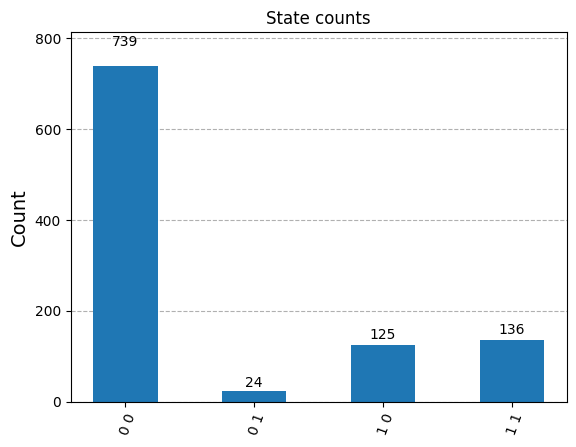

In [168]:
simulator = AerSimulator()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

qc.measure(rf,crf)
qc.measure(rb,crb)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

# TODO: how to filiter results with rf = 1?
